### **Problem Statement: Analyzing Airplane Crashes: A Comprehensive Study Motivated by Recent High-Severity Incidents**

We've all seen the constant news and media headlines on recent airline crashes. In the end of 2024 and early 2025, the aviation industry has experienced severe incidents that have raised concerns about air travel safety. On December 29, 2024, Jeju Air Flight 2216 crashed during landing at Muan International Airport in South Korea, resulting in 179 fatalities. Similarly, on December 25, 2024, Azerbaijan Airlines Flight J2-8243 crashed in Kazakhstan, leading to 38 deaths
These recent incidents have not only led to significant loss of life but have also left the public shaken when choosing to utilize air travel.

What are the evident trends that can help us identify the causes and how can we stay safe?

How do certian variables such as aircraft type, and operator factor in the frequency and severity of these crashes?

Our project aims to analyze airplane crash data to identify patterns and factors. We plan to process the "Airplane_Crashes_and_Fatalities_Since_1908" dataset found on Kaggle to answer our critical questions, creating an exploratory data analysis that can either help the public have peace in mind or comprehend the dangers of air travel.






## **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


## **Loading Dataset from Github (sourced from Kaggle)**

In [ ]:
# Load dataset from GitHub
file_url = "https://raw.githubusercontent.com/Suh716/Airplane-Crash-Data-Analysis-and-EDAs/refs/heads/dev/Airplane_Crashes_and_Fatalities_Since_1908.csv"
df = pd.read_csv(file_url)

# Combine first 5 rows, an empty row, and last 5 rows
combined_df = pd.concat([df.head(), pd.DataFrame([["—"] * len(df.columns)], columns=df.columns), df.tail()])

# Display as a clean table
display(combined_df)


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
0,—,—,—,—,—,—,—,—,—,—,—,—,—
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


## **Data Preprocessing and Cleaning**

First, we want to check the dataset for all the missing values. This gives us a good understanding of what percent of the dataset is usable and if we should continue.

In [ ]:
# Check basic info and missing values
df.info()
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB

Missing Values:
 Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In  

**Drop Duplicate Rows**

We want to get rid of all the duplicate values in our dataset to prevent distortion of our results.

In [ ]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

**Remove Unwanted Column**

Next, we decided to get rid of unneccessary columns. This will help keep our dataset clean and neat so that it's easier to work with. For this step, we chose to get rid of the following columns: Registration, Flight #, cn/In, and Ground.

Registration - knowing the registration of the plane won't really help in determining the overall dangers of air travel.

Flight # - same as the Registration column, knowing this detail won't add to the overall research.

cn/In - construction serial number, again it doesn't add value to the dataset.

Ground - this column tells us how many fatalities were on the ground. We decided to get rid of this column as we didn't see any difference between the "Fatality" column and the current one. "Fatalities" column paints the better overall image of the dangers of air travel, so we decided to stick with "Fatalities" instead of "Ground".

In [ ]:
# Drop the "Registration" column
df_cleaned = df_cleaned.drop(columns=["Registration"], errors="ignore")

# Drop the "Flight #" column
df_cleaned = df_cleaned.drop(columns=["Flight #"], errors="ignore")

# Drop the "cn/In" column
df_cleaned = df_cleaned.drop(columns=["cn/In"], errors="ignore")

# Drop the "Ground" column
df_cleaned = df_cleaned.drop(columns=["Ground"], errors="ignore")

**Drop missing values**

If more than 50% of the dataset is empty, we would drop the column that has the missing values. This would mean the column provided us with unusable data.

In [ ]:
#If more than 50% of the values are missing, drop the column
df_cleaned = df_cleaned.dropna(axis=1, thresh=len(df_cleaned) * 0.5)

**Reorder the Columns**

Here we are reordering the columns so the dataset is easier to view.

In [ ]:
#Organize the columns so it's more logical
new_column_order = ["Date", "Time", "Location", "Route", "Operator", "Type", "Aboard", "Fatalities", "Summary"]

# Reorder the columns
df_cleaned = df_cleaned[new_column_order]

**Format Date Column to datetime format**

We made sure all values in the "Date" column, are in the datetime format. This allows easier processing in the later steps when we conduct EDA.

In [ ]:
# Convert 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df['Date'], errors='coerce')

****

**Processing Common Words in Summary**



Finally, we iterated through all the summaries of the dataset to see what the most common key words are. This could give us a hint of what the cause of the crashes were.

In [ ]:
# Drop rows where 'Summary' is missing
df = df.dropna(subset=['Summary'])

# Split summaries into words and count occurrences
word_counts = Counter(" ".join(df['Summary']).lower().split())

# Filter words: remove those with length ≤ 2 and count > 1
filtered_words = {word: count for word, count in word_counts.items() if len(word) > 3 and count > 1}

# Sort by frequency (highest to lowest)
sorted_words = dict(sorted(filtered_words.items(), key=lambda x: x[1], reverse=True))

# Print result
print(sorted_words)


{'crashed': 2933, 'into': 2344, 'aircraft': 2136, 'plane': 1732, 'after': 1698, 'while': 1557, 'from': 1208, 'pilot': 936, 'flight': 865, 'with': 818, 'engine': 785, 'during': 783, 'failure': 751, 'crew': 694, 'approach': 614, 'which': 572, 'landing': 568, 'runway': 566, 'were': 556, 'taking': 534, 'struck': 509, 'cargo': 467, 'weather': 456, 'altitude': 451, 'control': 440, 'miles': 438, 'attempting': 433, 'mountain': 397, 'that': 368, 'poor': 356, 'when': 351, 'shortly': 346, 'left': 329, 'loss': 328, 'lost': 323, 'ground': 322, 'land': 313, 'right': 309, 'short': 300, 'down': 299, 'airport': 288, 'flying': 288, 'fire': 275, 'crashed.': 271, 'conditions.': 271, 'fuel': 270, 'takeoff': 270, 'failed': 265, 'airport.': 262, 'emergency': 254, 'accident': 248, 'route.': 242, 'wing': 238, 'runway.': 238, 'caused': 233, 'approach.': 229, 'below': 224, 'high': 223, 'minutes': 223, 'power': 218, 'feet': 213, 'improper': 212, 'conditions': 211, 'takeoff.': 211, 'trees': 208, 'before': 208, 'ma

# **Exploratory Data Analysis**

# **Crash Trend Over Time**

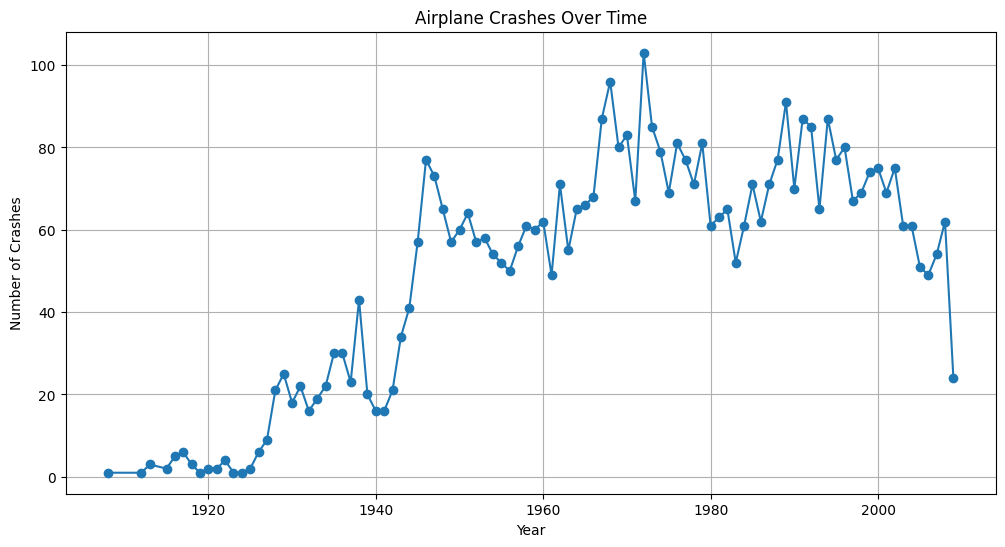

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year from the date
df['Year'] = df['Date'].dt.year

# Count crashes per year
crash_trend = df.groupby('Year').size()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(crash_trend, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.title("Airplane Crashes Over Time")
plt.grid()
plt.show()

Trend Analysis

*   Significant increase from 1900s-1970s, followed by a slight decline afterwards, which aligns with developments in aviation training, stricter regulations, and improved pilot training.
*   Sharp drop after 2000 after more devlopments in air traffic control, aircraft designs, and further regulation changes.

The sharp increase during the 1900s-1970s is most likely due to WWII and the icrease of aviation usage throughout 1920-1950. Post war, the use of comercial airlines became popular explaining the constant increase in crashes. The slight decline after 1980 could be said to be a result of implementing improved maintenance and automated safety measures.



# **Crashes by Month and Day of the Week**

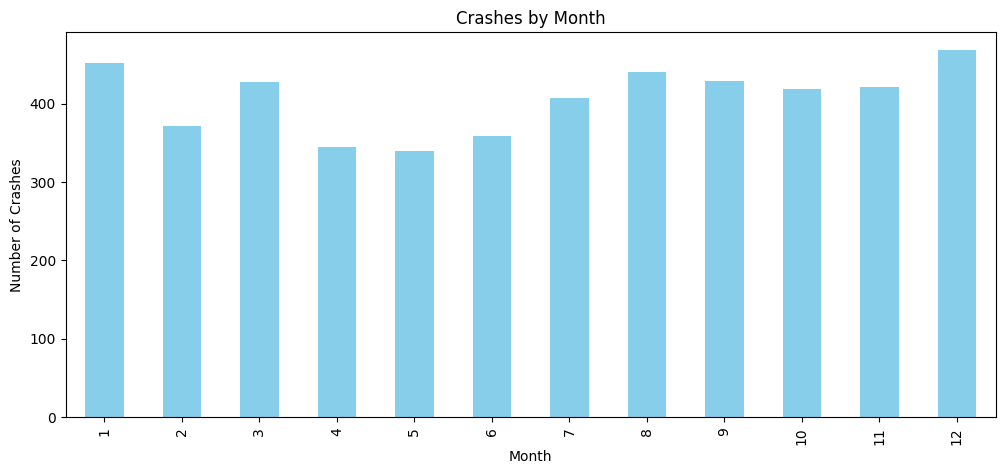

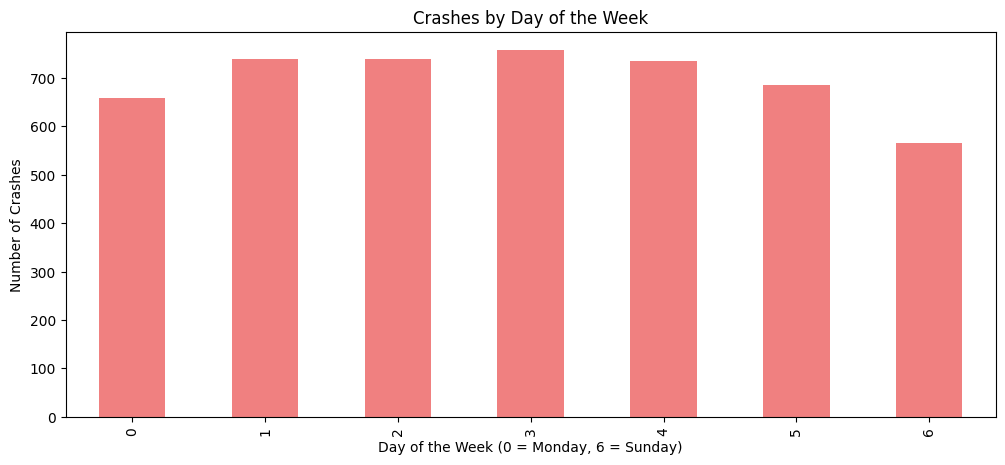

In [ ]:
# Extract Month and Day of the Week
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Plot crashes by month
plt.figure(figsize=(12, 5))
df['Month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.title("Crashes by Month")
plt.show()

# Plot crashes by day of the week
plt.figure(figsize=(12, 5))
df['Day_of_Week'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.xlabel("Day of the Week (0 = Monday, 6 = Sunday)")
plt.ylabel("Number of Crashes")
plt.title("Crashes by Day of the Week")
plt.show()



*   January, March, August, and December have the highest number of crashes.
*   Thursday and Friday have the highest number of crashes.

The findings of this chart suggests that there are more crashes in the months that have bad weather, like snow and heavy rain. When analyzing the crashes by the days of the week, we can see that more crashes happen towards the end of the week. More people travel towards the end of the week which increases the likelyhood of crashes as there are more flights.


# **Airlines with Most Crashes**

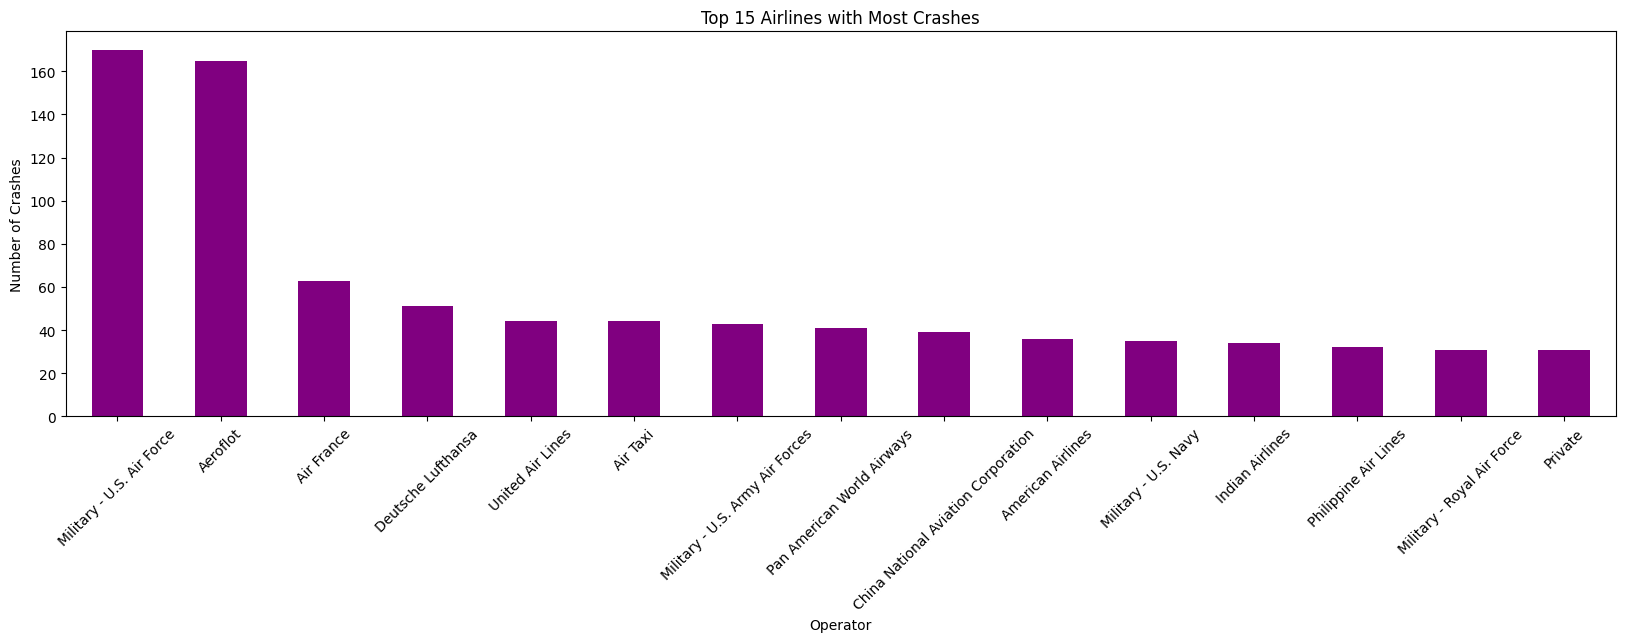

In [ ]:
# Remove blank or NaN operators
df_cleaned = df[df['Operator'].notna() & (df['Operator'].str.strip() != '')]

# Count crashes per airline
top_operators = df_cleaned['Operator'].value_counts().head(15)

# Plot
plt.figure(figsize=(20, 5))
top_operators.plot(kind='bar', color='purple')
plt.xlabel("Operator")
plt.ylabel("Number of Crashes")
plt.title("Top 15 Airlines with Most Crashes")
plt.xticks(rotation=45)
plt.show()



*   U.S. Air Force and the Russian Airline Aeroflot have had considerabley more crashes than most airlines.
*  Military and Government operated airline appear among the top 15 operators with the most crashes.

The high presence of military operators among the top entities suggests that apart from common aviation risks, these crashes could also be stemming from combat missions, training exercises, and other military operations. Aeroflot was the largest airline during the Soviet Union, handling both military and civilian flights, which explains the high rate of crashes. For future anaysis and processing, a sepearate feature can be implemented to distinguish between military and commercial operations.



# **Aircraft Model Analysis**

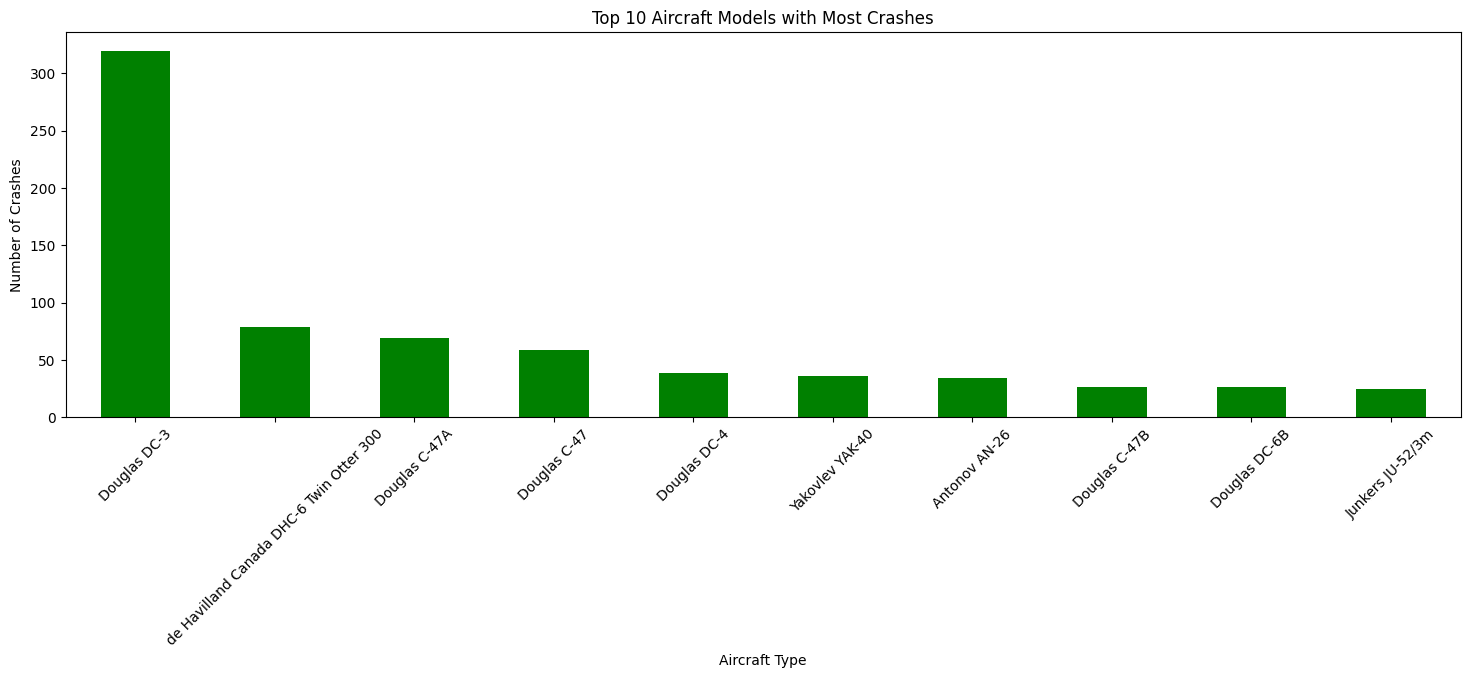

In [ ]:
# Count crashes per aircraft model
top_aircrafts = df['Type'].value_counts().head(10)

# Plot
plt.figure(figsize=(18, 5))
top_aircrafts.plot(kind='bar', color='green')
plt.xlabel("Aircraft Type")
plt.ylabel("Number of Crashes")
plt.title("Top 10 Aircraft Models with Most Crashes")
plt.xticks(rotation=45)
plt.show()




*   Douglas DC-3 recorded the most crashes than any other model with over 300 incidents.
*   Many of the mdoels in this top 10 are old aircraft models, mostly from the mid 20th century.

The Douglas DC-3 was heavily used since the 1930s for both military and civilian use, resulting in such a high recording of crashes. Most of these top aircrafts involved in incidents were extensivley used for military transport and operations. For future processing, this data could be more precisely classified under production eras to get a better understanding of how safety trends evovled. This data could also be used in downstream modeling for a predictive model as a categorical variable.



# **Fatalities per Crash**

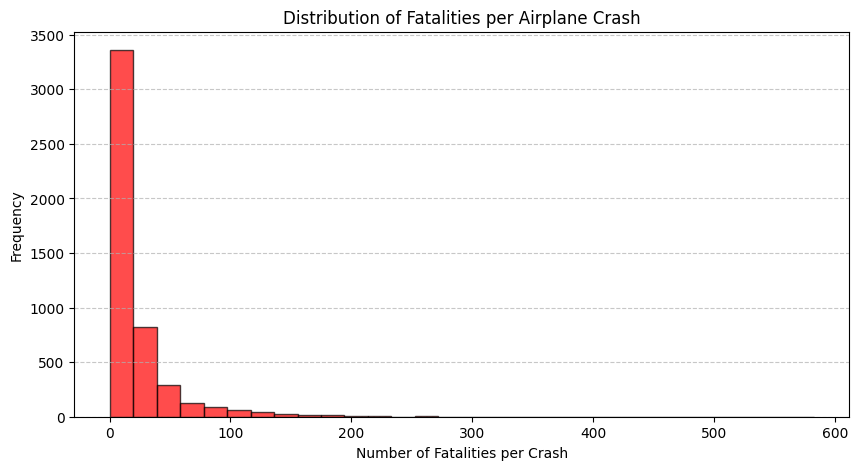

In [ ]:
# Remove NaN values in the 'Fatalities' column
df_fatalities = df['Fatalities'].dropna()

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(df_fatalities, bins=30, color='red', edgecolor='black', alpha=0.7)
plt.xlabel("Number of Fatalities per Crash")
plt.ylabel("Frequency")
plt.title("Distribution of Fatalities per Airplane Crash")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




*   Crashes don't necessarily result in fatalities.
*   There have been a few extreme outliers where crashes resulted in amount of deaths.

Depicting the survival rate of crashes, this data suggests that these incidents allow for partial/full survivability. Few extreme cases show that there can be devastating results of a crash, likely due to high speeds or difficult rescue scenarios.



# **Passenger Load vs. Fatality Rate**

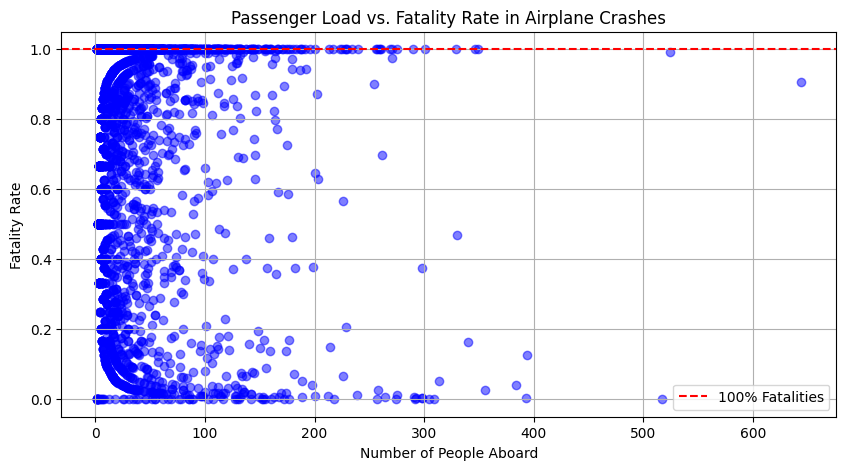

In [ ]:
# calculate fatality rate
df_filtered = df[['Aboard', 'Fatalities']].dropna()
df_filtered = df_filtered[df_filtered['Aboard'] > 0]  # Avoid division by zero
df_filtered['Fatality Rate'] = df_filtered['Fatalities'] / df_filtered['Aboard']

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['Aboard'], df_filtered['Fatality Rate'], alpha=0.5, color='blue')
plt.xlabel("Number of People Aboard")
plt.ylabel("Fatality Rate")
plt.title("Passenger Load vs. Fatality Rate in Airplane Crashes")
plt.axhline(y=1, color='r', linestyle='--', label='100% Fatalities')
plt.legend()
plt.grid()
plt.show()


The scatter plot reveals a strong pattern where airplane crashes often result in either complete survivability or total loss of life, with a significant number of incidents showing a 100% fatality rate, especially in larger aircraft.



*   Many crashes involve smaller aircraft, as seen from the dense clustering at lower passenger counts.
*   Crashes tend to be either fully survivable or completely fatal, with fewer cases of partial survivability.
*   Larger aircraft crashes still show instances of 100% fatalities, highlighting the severity of some accidents





# **Most Common Crash Causes (Human Error vs. Mechanical Failure)**

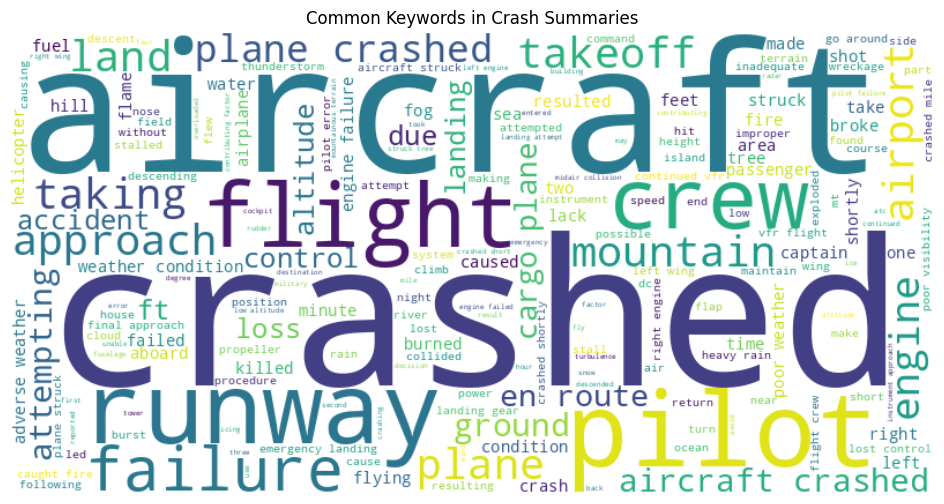

In [ ]:
# Concatenate all summaries into one text
summary_text = " ".join(df['Summary'].dropna()).lower()

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

# Display word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Keywords in Crash Summaries")
plt.show()

The word cloud visualization provides insight into common themes in aviation crash summaries.


*   **High-risk flight phases:** Accidents frequently occur during takeoff, landing, and descent.
*   **Mechanical and environmental risks:** Common causes include engine failures, adverse weather conditions, and altitude-related issues.
* **Human factors:** Words like "pilot," "crew," and "captain" suggest the role of human decision-making.
* **Crash locations:** Terms like "mountain" and "water" indicate challenging terrains often involved in accidents.



# **Phase 2**

**Linear Regression**

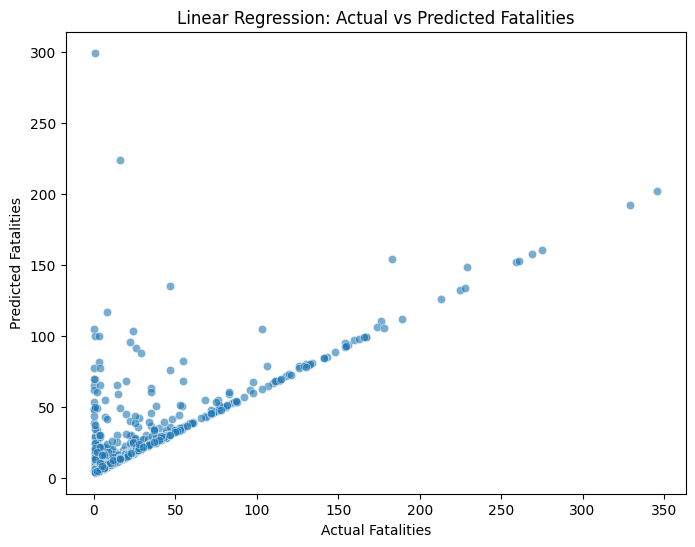

Linear Regression Metrics:
MAE: 11.43
MSE: 601.30
RMSE: 24.52


In [ ]:
# Drop rows with missing values in relevant columns
df_clean = df[['Aboard', 'Ground', 'Fatalities', 'Date']].dropna()

# Convert 'Date' to datetime format and extract the year
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
df_clean['Year'] = df_clean['Date'].dt.year
df_clean = df_clean.drop(columns=['Date'])


# Prepare for Linear Regression
X_reg = df_clean[['Aboard', 'Ground', 'Year']]
y_reg = df_clean['Fatalities']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)

# Predict
y_pred_reg = lin_reg.predict(X_test_reg_scaled)

# Evaluate regression model
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

# Visualization - Actual vs. Predicted Fatalities
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.6)
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Linear Regression: Actual vs Predicted Fatalities")
plt.show()

# Display Evaluation Metrics
print("Linear Regression Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Linear regression was chosen as the appropriate method for predicting fatalities in airplane crashes because the target variable, the number of fatalities, is a continuous numerical value. The model was trained using key features such as the number of people aboard, the number of ground fatalities, and the year of the crash. To improve accuracy, the features were standardized using StandardScaler, and an 80-20 train-test split was applied, meaning 80% of the data was used for training the model while 20% was reserved for testing its performance. The model's performance was evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), with RMSE at 24.52 indicating some variance in predictions. The scatter plot of actual versus predicted values showed a general trend but also highlighted variability, suggesting that additional factors influence fatalities. The model confirms that the number of people aboard is a strong predictor of fatalities, but external variables such as aircraft type, operator, and crash cause may enhance prediction accuracy

**Logistics Regression**

In [ ]:
import time
from sklearn.metrics import precision_score, f1_score

# ⏱ Start timing
start_time = time.time()

# Create High_Fatality target
df_clean['High_Fatality'] = (df_clean['Fatalities'] > 50).astype(int)

# Feature and label
X_cls = df_clean[['Aboard', 'Ground', 'Year']]
y_cls = df_clean['High_Fatality']

# Train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Standardize
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_cls_scaled, y_train_cls)

# Predict
y_pred_cls = log_reg.predict(X_test_cls_scaled)

# ⏱ End timing
end_time = time.time()
exec_time = round(end_time - start_time, 2)

# Metrics
accuracy = accuracy_score(y_test_cls, y_pred_cls)
precision = precision_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls)
class_report = classification_report(y_test_cls, y_pred_cls)

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Fatality', 'High Fatality'],
            yticklabels=['Low Fatality', 'High Fatality'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression: Confusion Matrix")
plt.show()

# 📊 Display Metrics
print("\nLogistic Regression Metrics:")
print(f"Execution Time: {exec_time} seconds")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:")
print(class_report)


PySparkTypeError: [NOT_COLUMN_OR_STR] Argument `col` should be a Column or str, got float.

Logistic regression was selected to classify crashes into high-fatality (>50 deaths) or low-fatality (≤50 deaths) categories. This algorithm is well-suited for binary classification problems and provides interpretability. The model was trained using standardized features, including the number of people aboard, ground fatalities, and the year of the crash. An 80-20 train-test split was used to evaluate performance, meaning 80% of the data was used to train the model while 20% was reserved to test how well it generalizes to unseen cases. The model achieved an accuracy score of 0.93, with high precision for low-fatality cases but lower recall for high-fatality events, indicating a challenge in predicting rare catastrophic crashes. The confusion matrix revealed that the model performed well for low-fatality crashes but had difficulties predicting high-fatality cases due to class imbalance. To improve predictions, techniques such as oversampling (SMOTE) or adjusting classification thresholds could be employed. Additionally, incorporating features like aircraft type and crash cause could enhance the model's ability to distinguish between high- and low-fatality events.

**K-Means Clustering**

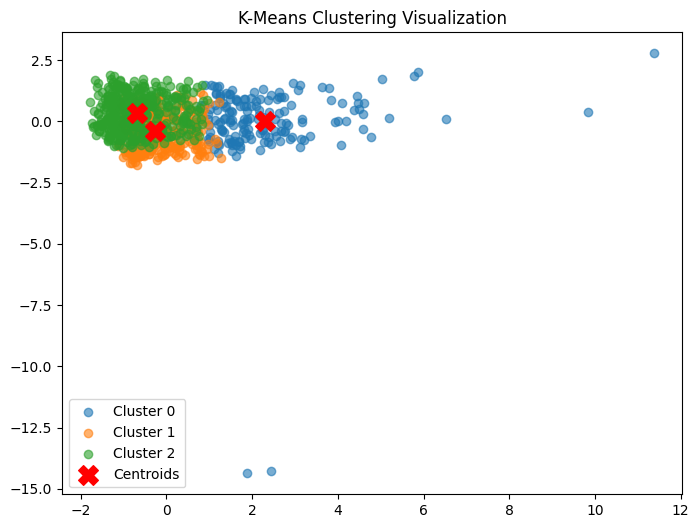

In [ ]:
# Drop NaN values
df_cleaned = df_cleaned.dropna()

# Drop columns with datetime values
df_cleaned = df_cleaned.select_dtypes(exclude=['datetime', 'object'])

# Ensure only numerical columns are used
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce').dropna()

# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

#chosen k value
chosen_k = 3

# Apply K-Means
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
for cluster in range(chosen_k):
    plt.scatter(df_pca[df_cleaned['Cluster'] == cluster, 0],
                df_pca[df_cleaned['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}', alpha=0.6)

# Plot centroids
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label="Centroids")

plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()


We selected K-Means as one of the algorithms to find the patterns in airplane crash data by grouping the accidents togther based on the similarities found such as the location, aircraft, and weather. The model was first trained using StandardScalar to standardize the data. We randomly selected a K value, in this case we believed k=3 best represents our data. After selecting k=3, K-Means was applied which then assigned the data points to the clusters. The visualization shown displays 3 distinctly separated. The centroids, represented by the red "X", show where the data points are being grouped, the average position of the data points in those clusters. We applied the PCA (Principal Component Analysis) to allow for a clearer visualization of the clusters. Through the separations of the clusters, we can tell that K-means was successful in finding the patterns within the data. The results of the algorithm gave us insight into common crash patterns. The findings from this algorithm can help find the high-risk areas of aviation.

**k-NN**

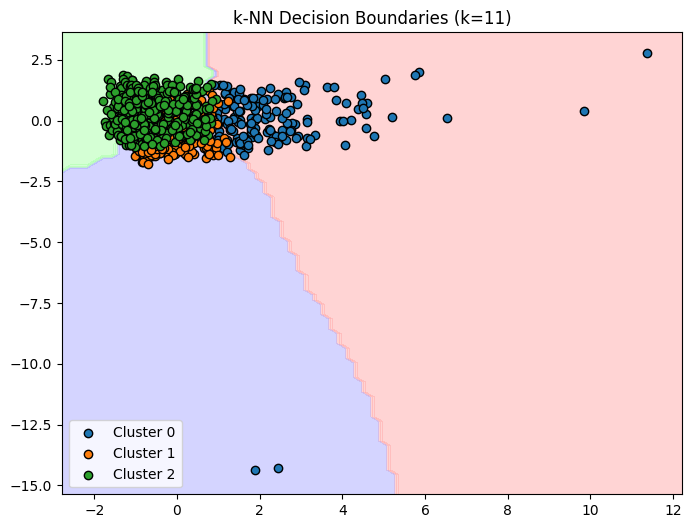

In [ ]:
# Preprocess the Data
df_cleaned = df_cleaned.dropna()  # Drop NaN values
df_cleaned = df_cleaned.select_dtypes(include=[np.number])  # Keep only numerical data

# Define features (X) and target (y)
X = df_cleaned.drop(columns=['Cluster'])  # Use all features except cluster label
y = df_cleaned['Cluster']  # Target variable

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train k-NN using predefined k value
k_value = 11  # Predefined k
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(X_train, y_train)

# Apply PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot Decision Boundaries
h = 0.2  # Step size for mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for each point in mesh
Z = knn.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Create color map
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_bold = ['red', 'blue', 'green']

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)

# Plot the data points
for cluster in np.unique(y):
    plt.scatter(X_pca[y == cluster, 0], X_pca[y == cluster, 1],
                label=f'Cluster {cluster}', edgecolor='k')

plt.title(f'k-NN Decision Boundaries (k={k_value})')
plt.legend()
plt.show()


We chose the k-Nearest Neighbor algorithm to further classify airplane crashes based on the different factors. The optimal k was selected randomly, we settled with 11 as it best represents our data. k-NN provided further confirmation of the similarities between the crashes. The different clusters show which data points have similarities between the crashes. Looking at these data points give us further insight on what risks there are within aviation.

**Naive Bayes**

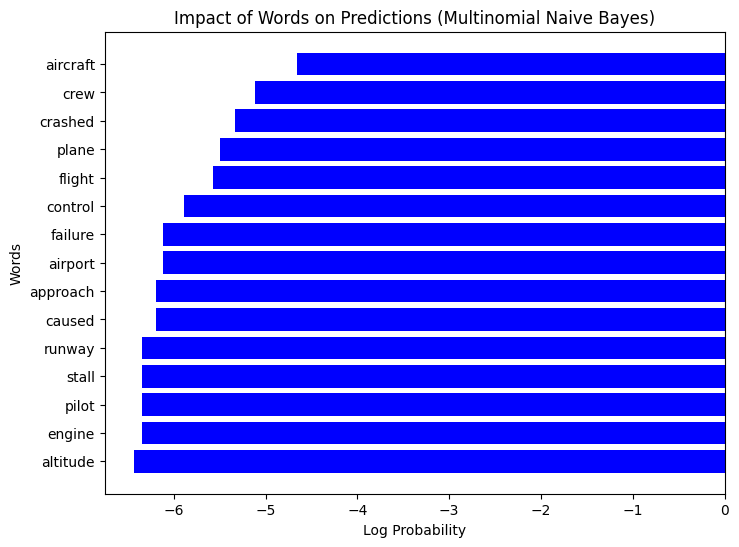

Model Accuracy: 87.36%


In [ ]:
# Define crash severity based on fatalities
def classify_severity(fatalities):
    if fatalities == 0:
        return "No Fatalities"
    elif fatalities < 50:
        return "Low"
    elif fatalities < 150:
        return "Medium"
    else:
        return "High"

df['Severity'] = df['Fatalities'].apply(classify_severity)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['Summary'], df['Severity'], test_size=0.3, random_state=42)

# Naïve Bayes with Sklearn Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english', max_features=5000)),
    ('nb', MultinomialNB())
])

# Train model
clf.fit(X_train, y_train)

# Model score
accuracy = clf.score(X_test, y_test)
# Feature Importance Visualization
vectorizer = clf.named_steps['vectorizer']
feature_names = np.array(vectorizer.get_feature_names_out())
nb_model = clf.named_steps['nb']

# Identify top words that impact classification the most using log probabilities
top_features = np.argsort(nb_model.feature_log_prob_[0])[-15:]  # Get top 15 most predictive words

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_names[top_features], nb_model.feature_log_prob_[0][top_features], color="blue")
plt.xlabel("Log Probability")
plt.ylabel("Words")
plt.title("Impact of Words on Predictions (Multinomial Naive Bayes)")
plt.show()
print(f"Model Accuracy: {accuracy * 100:.2f}%")


The Naive Bayes algorithm was chosen for our project since it is effective at text classification, therefore making it suitable for analyzing crash descriptions. We used the Multinomial since it is designed for discrete data, which we used for word frequencies in the Summary column of our dataset. The visualization shown above words with the most influence on predictions using log probabilities. It helps us interpret how different keywords in the summaries of crashes contribute to classifying crash severity and highlights patterns in aircraft accidents.


**Random Forest**

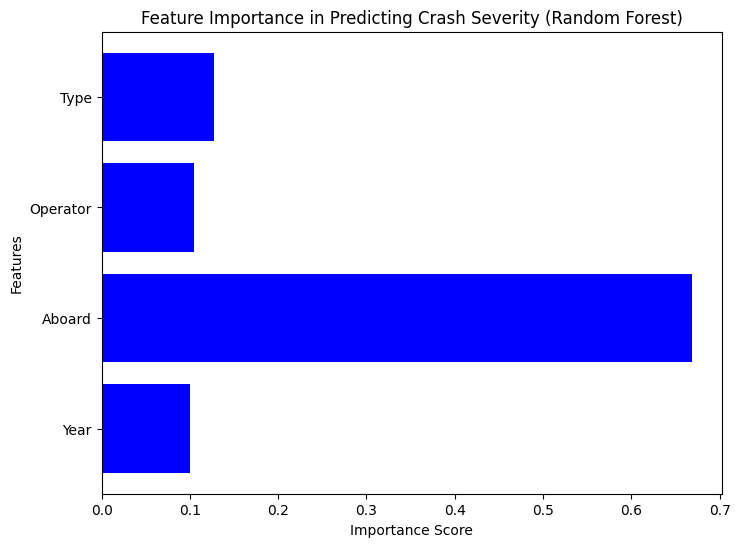

Model Accuracy: 92.42%


In [ ]:
# Load dataset (assuming df is preloaded)
# Define crash severity based on fatalities
def classify_severity(fatalities):
    if fatalities == 0:
        return "No Fatalities"
    elif fatalities < 50:
        return "Low"
    elif fatalities < 150:
        return "Medium"
    else:
        return "High"

df['Severity'] = df['Fatalities'].apply(classify_severity)

# Encode categorical variables
label_encoders = {}
for col in ['Operator', 'Type']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df[['Year', 'Aboard', 'Operator', 'Type']]
y = df['Severity']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Feature Importance Visualization
feature_importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importance, color="blue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Crash Severity (Random Forest)")
plt.show()
print(f"Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


As one of the algorithms that wasn't touched on in class, we decided to use the Random Forest Classifier algorithm since it can handle both numerical and categorical data allowing it to use our features such as Year, Abroad, Aircraft Type, and Operator. Another attribute of this algorithm is that it can capture the complex relationships between crash factors in this project. The visualization above shows which factors contributed the most when predicting crash severity. This algorithm can help with improving accident analysis and also safety recommendations.


The following sources were used for this implementation.

https://www.ibm.com/think/topics/random-forest

https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial

Documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Phase 3

**Setup Environment**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
import pandas as pd

**Start Spark**

In [ ]:
spark = SparkSession.builder.appName("AirplaneCrash_Phase3").getOrCreate()

**Loading Dataset from Github (Sourced from Kaggle)**

In [ ]:
# Load dataset from GitHub
url = "https://raw.githubusercontent.com/Suh716/Airplane-Crash-Data-Analysis-and-EDAs/dev/Airplane_Crashes_and_Fatalities_Since_1908.csv"
pandas_df = pd.read_csv(url)

# Convert Pandas DataFrame to Spark DataFrame
df = spark.createDataFrame(pandas_df)

# Show first few rows
df.show(5)

# Check the schema
df.printSchema()

+----------+-----+--------------------+--------------------+--------+-------------+--------------------+------------+-----+------+----------+------+--------------------+
|      Date| Time|            Location|            Operator|Flight #|        Route|                Type|Registration|cn/In|Aboard|Fatalities|Ground|             Summary|
+----------+-----+--------------------+--------------------+--------+-------------+--------------------+------------+-----+------+----------+------+--------------------+
|09/17/1908|17:18| Fort Myer, Virginia|Military - U.S. Army|     NaN|Demonstration|    Wright Flyer III|         NaN|    1|   2.0|       1.0|   0.0|During a demonstr...|
|07/12/1912|06:30|AtlantiCity, New ...|Military - U.S. Navy|     NaN|  Test flight|           Dirigible|         NaN|  NaN|   5.0|       5.0|   0.0|First U.S. dirigi...|
|08/06/1913|  NaN|Victoria, British...|             Private|       -|          NaN|    Curtiss seaplane|         NaN|  NaN|   1.0|       1.0|   0.0|Th

In [ ]:
!pip install -q pyngrok

from pyngrok import conf, ngrok

# Paste your authtoken below (replace YOUR_TOKEN_HERE with your real token)
conf.get_default().auth_token = "2vh1PR2i6Uqc5IjGkeIlnUN6Roc_2zKmpjADb1R6JGczFJfQK"

# Start the tunnel
ngrok.kill()
public_url = ngrok.connect(4040)
print(f"Spark UI available at: {public_url}")

Spark UI available at: NgrokTunnel: "https://4e55-34-169-80-196.ngrok-free.app" -> "http://localhost:4040"


#Distributed Data Cleaning/Processing

**1. Get Rid of Null Values**

In [ ]:
df_one = df.na.drop()
df_one.show(5)

+----------+-----+--------------------+--------------------+--------+-------------+--------------------+------------+-----+------+----------+------+--------------------+
|      Date| Time|            Location|            Operator|Flight #|        Route|                Type|Registration|cn/In|Aboard|Fatalities|Ground|             Summary|
+----------+-----+--------------------+--------------------+--------+-------------+--------------------+------------+-----+------+----------+------+--------------------+
|09/17/1908|17:18| Fort Myer, Virginia|Military - U.S. Army|     NaN|Demonstration|    Wright Flyer III|         NaN|    1|   2.0|       1.0|   0.0|During a demonstr...|
|07/12/1912|06:30|AtlantiCity, New ...|Military - U.S. Navy|     NaN|  Test flight|           Dirigible|         NaN|  NaN|   5.0|       5.0|   0.0|First U.S. dirigi...|
|08/06/1913|  NaN|Victoria, British...|             Private|       -|          NaN|    Curtiss seaplane|         NaN|  NaN|   1.0|       1.0|   0.0|Th

Removes any rows with null values to ensure complete data quality before more processing.

**2. Drop Columns We Can't Model With**

In [ ]:
# Step 2: Add 'Survivors' and 'Year' columns
from pyspark.sql.functions import col, year, to_date

df_one = df_one.withColumn("Survivors", col("Aboard") - col("Fatalities"))
df_one = df_one.withColumn("Date", to_date("Date", "MM/dd/yyyy"))
df_one = df_one.withColumn("Year", year("Date"))

#select the correct columns
df_two = df_one.select("Fatalities", "Aboard", "Ground", "Survivors", "Year")
df_two.show(5)

+----------+------+------+---------+----+
|Fatalities|Aboard|Ground|Survivors|Year|
+----------+------+------+---------+----+
|       1.0|   2.0|   0.0|      1.0|1908|
|       5.0|   5.0|   0.0|      0.0|1912|
|       1.0|   1.0|   0.0|      0.0|1913|
|      14.0|  20.0|   0.0|      6.0|1913|
|      30.0|  30.0|   0.0|      0.0|1913|
+----------+------+------+---------+----+
only showing top 5 rows



Calculates the number of survivors by subtracting fatalities from the number aboard and converts the date into a proper date format and extracts the year, which can be useful to analyze trends over time.

**3. Create a binary label: High Fatal Crash or Not**

In [ ]:
from pyspark.sql.functions import when, col

df_three = df_two.withColumn("label", when(col("Fatalities") > 10, 1).otherwise(0))
df_three.show(5)


+----------+------+------+---------+----+-----+
|Fatalities|Aboard|Ground|Survivors|Year|label|
+----------+------+------+---------+----+-----+
|       1.0|   2.0|   0.0|      1.0|1908|    0|
|       5.0|   5.0|   0.0|      0.0|1912|    0|
|       1.0|   1.0|   0.0|      0.0|1913|    0|
|      14.0|  20.0|   0.0|      6.0|1913|    1|
|      30.0|  30.0|   0.0|      0.0|1913|    1|
+----------+------+------+---------+----+-----+
only showing top 5 rows



Makes a binary label where crashes with fatalities greater than 10 are marked as high fatality and others as low fatality.

**4. Assemble the Features**

In [ ]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["Aboard", "Ground", "Survivors", "Year"], outputCol="features")
df_four = assembler.transform(df_three)
df_four.show(5)


+----------+------+------+---------+----+-----+--------------------+
|Fatalities|Aboard|Ground|Survivors|Year|label|            features|
+----------+------+------+---------+----+-----+--------------------+
|       1.0|   2.0|   0.0|      1.0|1908|    0|[2.0,0.0,1.0,1908.0]|
|       5.0|   5.0|   0.0|      0.0|1912|    0|[5.0,0.0,0.0,1912.0]|
|       1.0|   1.0|   0.0|      0.0|1913|    0|[1.0,0.0,0.0,1913.0]|
|      14.0|  20.0|   0.0|      6.0|1913|    1|[20.0,0.0,6.0,191...|
|      30.0|  30.0|   0.0|      0.0|1913|    1|[30.0,0.0,0.0,191...|
+----------+------+------+---------+----+-----+--------------------+
only showing top 5 rows



Combines features into a single vector so that Spark ML algorithms can use it as a single vector column for input.

**5.Final Features and Label**

In [ ]:
df_five = df_four.select("label", "features")
df_five.show(5)


+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[2.0,0.0,1.0,1908.0]|
|    0|[5.0,0.0,0.0,1912.0]|
|    0|[1.0,0.0,0.0,1913.0]|
|    1|[20.0,0.0,6.0,191...|
|    1|[30.0,0.0,0.0,191...|
+-----+--------------------+
only showing top 5 rows



Makes the final dataset with only two columns, "label" and "features", which will be used for training and testing so the models have the correct inputs for supervised learning.

**6. Split**

In [ ]:
train_data, test_data = df_five.randomSplit([0.7, 0.3], seed=42)


In [ ]:
train_data = train_data.withColumn("label", col("label").cast("int"))
test_data = test_data.withColumn("label", col("label").cast("int"))


#Algorithms/Visualizations [50 marks]

In [ ]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier,  NaiveBayes

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**1: Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr_model = lr.fit(train_data)
lr_preds = lr_model.transform(test_data)

 The prediction gives a binary label, 1 for high fatality crashes and 0 for low fatality crashes. Uses features like Aboard, Ground, Survivors, and Year.

**2: Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(train_data)
dt_preds = dt_model.transform(test_data)

This model learns a set of rules by splitting the data based on features like the number of people aboard, ground casualties, computed survivors, and the year. It classifies each entry as a high fatality crash or a low fatality crash. This lets you see the key factors and their thresholds affecting crash severity.

**3: Random Forest**

In [ ]:
rf = RandomForestClassifier()
rf_model = rf.fit(train_data)
rf_preds = rf_model.transform(test_data)

This method builds multiple decision trees on random subsets of the data and features. Each tree is built using features such as Aboard, Ground, Survivors, and Year to predict whether a crash is high fatality or low fatality. The model then gets the predictions from all trees to produce a final classification. This gets us less overfitting compared to a single decision tree and leads to better overall prediction accuracy and robustness by averaging the outputs from different trees.

**4: Niave Bayes**

In [ ]:
nb = NaiveBayes()
nb_model = nb.fit(train_data)
nb_preds = nb_model.transform(test_data)


This model finds an estimate of the probability that a crash is high fatality based on feature likelihoods. Using the number of people aboard, survivors, and the year of the crash. The model assigns a binary label and this helps us in understanding the impact of each feature on the severity of an airplane crash.

**5: K-Means**

In [ ]:
kmeans = KMeans(k=2, seed=1)
kmeans_model = kmeans.fit(df_five)
kmeans_preds = kmeans_model.transform(df_five)

This clusters the data into two groups based on the numerical features from the preprocessing data. Using the feature vector, this partitions the dataset into two clusters. This process finds the groupings in the data. Unlike the supervised models, it ignores the predefined binary label but instead finds patterns in the dataset.

Test

In [ ]:
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

print("Logistic Regression Accuracy:", evaluator.evaluate(lr_preds))
print("Decision Tree Accuracy:", evaluator.evaluate(dt_preds))
print("Random Forest Accuracy:", evaluator.evaluate(rf_preds))
print("Niave Accuracy:", evaluator.evaluate(nb_preds))

Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 0.9618671926364234
Random Forest Accuracy: 0.9638395792241946
Niave Accuracy: 0.7435897435897436


In [ ]:
ngrok.kill()


In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import builtins  # use builtins to access the original round()

# Train Logistic Regression model
lr = LogisticRegression()
lr_model = lr.fit(train_data)
lr_preds = lr_model.transform(test_data)
lr_preds.count()  # Force execution

# Set up evaluator and compute metrics (using weightedPrecision instead of precision)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy_lr = evaluator.setMetricName("accuracy").evaluate(lr_preds)
weighted_precision_lr = evaluator.setMetricName("weightedPrecision").evaluate(lr_preds)
f1_lr = evaluator.setMetricName("f1").evaluate(lr_preds)

# Print only the performance metrics using the built-in round
print(f"Accuracy: {builtins.round(accuracy_lr, 4)}")
print(f"Weighted Precision: {builtins.round(weighted_precision_lr, 4)}")
print(f"F1 Score: {builtins.round(f1_lr, 4)}")


Accuracy: 1.0
Weighted Precision: 1.0
F1 Score: 1.0


In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import builtins

# Train the Random Forest model
rf = RandomForestClassifier(seed=42)
rf_model = rf.fit(train_data)
rf_preds = rf_model.transform(test_data)
rf_preds.count()  # Force execution

# Set up evaluator and compute metrics
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy_rf = evaluator.setMetricName("accuracy").evaluate(rf_preds)
weighted_precision_rf = evaluator.setMetricName("weightedPrecision").evaluate(rf_preds)
f1_rf = evaluator.setMetricName("f1").evaluate(rf_preds)

# Print the performance metrics
print(f"Random Forest Accuracy: {builtins.round(accuracy_rf, 4)}")
print(f"Random Forest Weighted Precision: {builtins.round(weighted_precision_rf, 4)}")
print(f"Random Forest F1 Score: {builtins.round(f1_rf, 4)}")


Random Forest Accuracy: 0.9652
Random Forest Weighted Precision: 0.9659
Random Forest F1 Score: 0.9652


In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import builtins

# Train the KMeans model
kmeans = KMeans(k=2, seed=42)
kmeans_model = kmeans.fit(df_five)
kmeans_preds = kmeans_model.transform(df_five)
kmeans_preds.count()  # Force execution

# Evaluate clustering performance using the silhouette score
evaluator_cluster = ClusteringEvaluator()
sil_score = evaluator_cluster.evaluate(kmeans_preds)

# Print the silhouette score
print(f"KMeans Silhouette Score: {builtins.round(sil_score, 4)}")


KMeans Silhouette Score: 0.8756
